In [1]:
import napari
import numpy as np
from numpy.lib.format import open_memmap
import myfunctions as mf
import os
import matplotlib.pyplot as plt
from skimage.measure import regionprops
import seaborn as sns
import pandas as pd

##### Segmentation visualization

In [24]:
OS = 'MacOS'
exp = mf.exp_list()[0]

hypervolume = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume.npy'), mode='r')
hypervolume_mask = open_memmap(os.path.join(mf.OS_path(exp, OS), 'hypervolume_mask.npy'), mode='r')
print(hypervolume_mask.shape)
print(hypervolume.shape)

(55, 270, 500, 500)
(55, 270, 500, 500)


In [3]:
viewer = napari.Viewer()

images = [viewer.add_image(hypervolume[:,100:150], name='Volume', opacity=0.4)]
labels = [viewer.add_labels(hypervolume_mask[:,100:150], name='Labels', blending='additive', opacity=0.8)]

settings = napari.settings.get_settings()
settings.application.playback_fps = 5
viewer.dims.current_step = (0, 0)

##### Data loading and saving

In [ ]:
# position = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/position.npy')
# volume = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/volume.npy')
# speed = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/speed.npy')
# volume_exp_rate = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/volume_exp_rate.npy')
# avg_volume = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/avg_volume.npy')
# agg_number = np.load('../../MasterThesisData/P28A_FT_H_Exp1/motion_properties/agg_number.npy')

In [43]:
# position = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/position.npy'))
# volume = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/volume.npy'))
# speed = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/speed.npy'))
# volume_exp_rate = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/volume_exp_rate.npy'))
# avg_volume = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/avg_volume.npy'))
# agg_number = np.load(os.path.join(mf.OS_path(exp, OS), 'motion_properties/agg_number.npy'))

In [ ]:
# position, volume, speed, volume_exp_rate, avg_volume, agg_number = mf.motion_matrix(hypervolume_mask, exp)


In [5]:
# array_list = [position, volume, speed, volume_exp_rate, avg_volume, agg_number]
# for a in array_list:
#     print(a.shape)

(55, 1010, 3)
(55, 1010)
(54, 1010, 3)
(54, 1010)
(55, 3, 3)
(55, 3, 3)


In [35]:
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/position.npy'), position)
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/volume.npy'), volume)
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/speed.npy'), speed)
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/volume_exp_rate.npy'), volume_exp_rate)
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/avg_volume.npy'), avg_volume)
# np.save(os.path.join(mf.OS_path(exp, OS), 'motion_properties/agg_number.npy'), agg_number)

In [25]:
df = mf.motion_df(hypervolume_mask, exp)
df.to_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'), index=False)


Computing motion matrix...


Computing motion dataframe:  87%|████████▋ | 48/55 [1:08:14<15:27, 132.53s/it]

In [ ]:
df = pd.read_csv(os.path.join(mf.OS_path(exp, OS), 'motion_properties.csv'))

##### Data plotting from <code>np.arrays</code>

In [44]:
plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(position.shape[0])/20

Position of the agglomerates (I should do two scatterplots, one from top view and one from side view, plotting the positions of the agglomerates)

Volume of the agglomerates

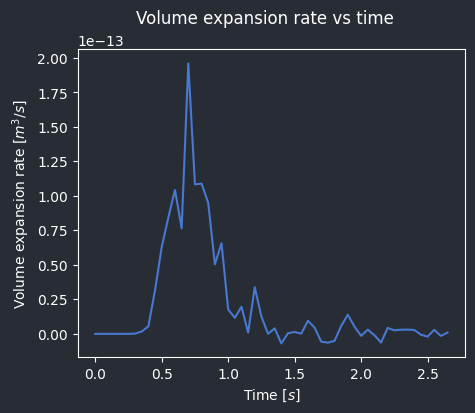

In [45]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Volume vs time')

ax.plot(time_axis, np.mean(volume, axis=1))

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
_ = ax.set_ylabel('Volume [$m^3$]')

Speed of the agglomerates (**This should also be done region wise!**)

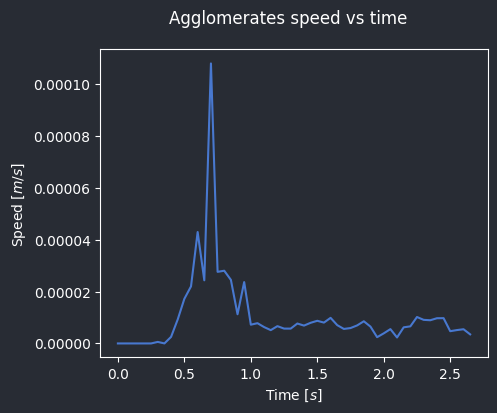

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Agglomerates speed vs time')

speed_norm = np.zeros(speed.shape[0], dtype=np.double)
for i in range(speed.shape[0]):
    speed_norm[i] = np.mean(np.linalg.norm(speed[i, :, :], axis=1))

ax.plot(time_axis[:-1], speed_norm)

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
_ = ax.set_ylabel('Speed [$m/s$]')

Mean volume expansion rate of the agglomerates

Text(0, 0.5, 'Volume expansion rate [$m^3/s$]')

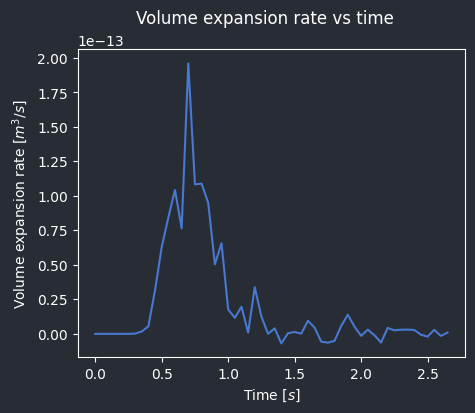

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), facecolor='#282C34')
fig.suptitle('Volume expansion rate vs time')

ax.plot(time_axis[:-1], np.mean(volume_exp_rate, axis=1))

ax.set_facecolor('#282C34')
ax.set_xlabel('Time [$s$]')
ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise mean volume of the agglomerates

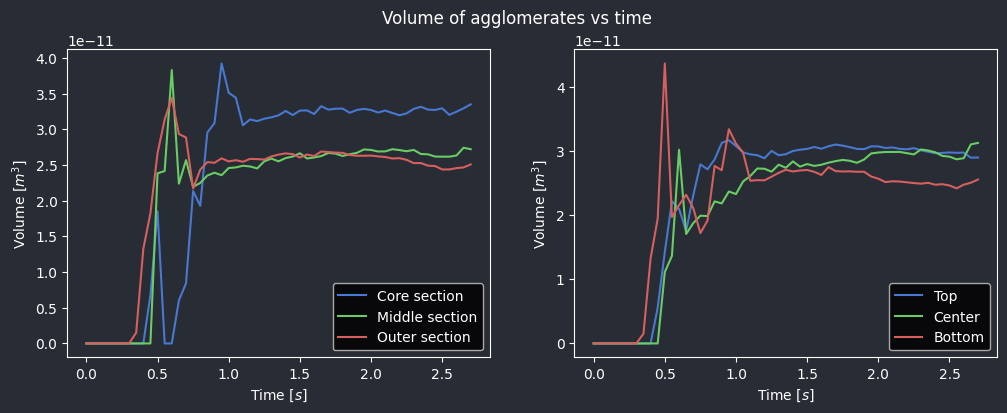

In [50]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='#282C34')
fig.suptitle('Volume of agglomerates vs time')

ax = axs[0]
ax.plot(time_axis, np.mean(avg_volume[:,:,0], axis=1), label='Core section')
ax.plot(time_axis, np.mean(avg_volume[:,:,1], axis=1), label='Middle section')
ax.plot(time_axis, np.mean(avg_volume[:,:,2], axis=1), label='Outer section')

ax = axs[1]
ax.plot(time_axis, np.mean(avg_volume[:,0,:], axis=1), label='Top')
ax.plot(time_axis, np.mean(avg_volume[:,1,:], axis=1), label='Center')
ax.plot(time_axis, np.mean(avg_volume[:,2,:], axis=1), label='Bottom')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.legend(loc='lower right')
    ax.set_xlabel('Time [$s$]')
    ax.set_ylabel('Volume [$m^3$]')

Region-wise number of agglomerates (this has to be converted into a density since different sections in $r$ have different volumes)

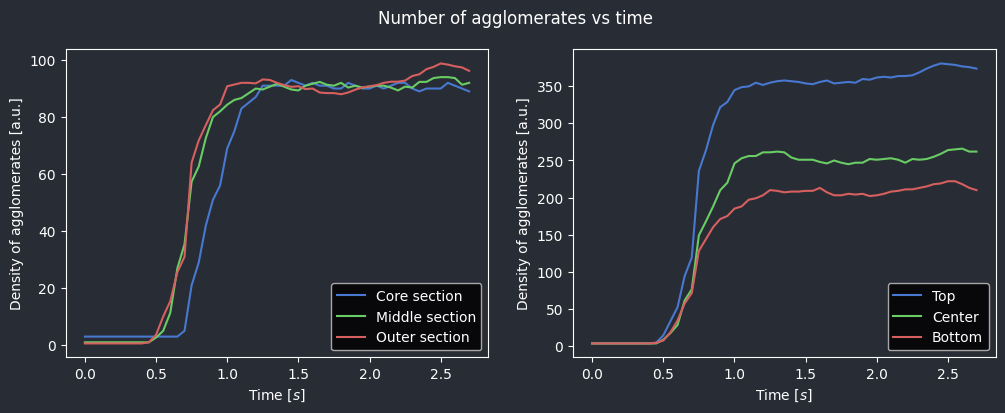

In [51]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4), facecolor='#282C34')
fig.suptitle('Number of agglomerates vs time')

ax = axs[0]
ax.plot(time_axis, np.sum(agg_number[:,:,0], axis=1), label='Core section')
ax.plot(time_axis, np.sum(agg_number[:,:,1]/3, axis=1), label='Middle section') # 3 is the multiplication factor to take into account to evaluate the density of middle section
ax.plot(time_axis, np.sum(agg_number[:,:,2]/5, axis=1), label='Outer section')  # 3 is the multiplication factor to take into account to evaluate the density of external section

ax = axs[1]
ax.plot(time_axis, np.sum(agg_number[:,0,:], axis=1), label='Top')
ax.plot(time_axis, np.sum(agg_number[:,1,:], axis=1), label='Center')
ax.plot(time_axis, np.sum(agg_number[:,2,:], axis=1), label='Bottom')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.legend(loc='lower right')
    ax.set_xlabel('Time [$s$]')
    ax.set_ylabel('Density of agglomerates [a.u.]')

In [16]:
# x_ratio, y_ratio, z_ratio, v_ratio, t_ratio, radius = mf.find_ratio(hypervolume_mask, exp)

In [34]:
# radii = np.linspace(0, radius*x_ratio, 3+1)
# slices = np.linspace(0, 270*z_ratio, 3+1)
# avg_volume = np.zeros((55, 3, 3), dtype=np.double)
# agg_number = np.zeros((55, 3, 3), dtype=np.ushort)
# for t in range(55):
#         for z in range(3):
#             for r in range(3):
#                 for label in range(1010):
#                     if (position[t, label, 0] != 0 and position[t, label, 1] != 0 and position[t, label, 2] != 0 and 
#                         slices[z] <= position[t, label, 0] and position[t, label, 0] < slices[z+1] and 
#                         radii[r] <= np.linalg.norm(position[t, label, 1:]) and np.linalg.norm(position[t, label, 1:]) < radii[r+1]):
#                         avg_volume[t, z, r] += volume[t, label]
#                         agg_number[t, z, r] += 1
# agg_number[agg_number == 0] = 1
# avg_volume = avg_volume / agg_number

##### Data plotting from <code>pd.DataFrame</code>

In [7]:
plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-muted')
time_axis = np.arange(len(np.unique(df['t'])))/20

Volume of the agglomerates

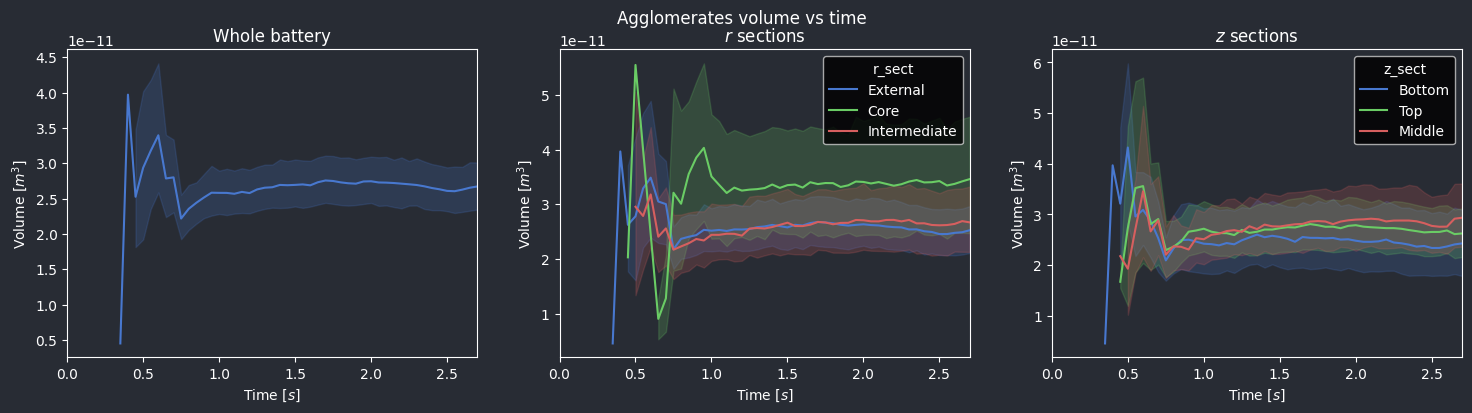

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5), facecolor='#282C34')
# fig.suptitle('Agglomerates volume vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='V')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='V', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='V', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume [$m^3$]')

Speed of the agglomerates

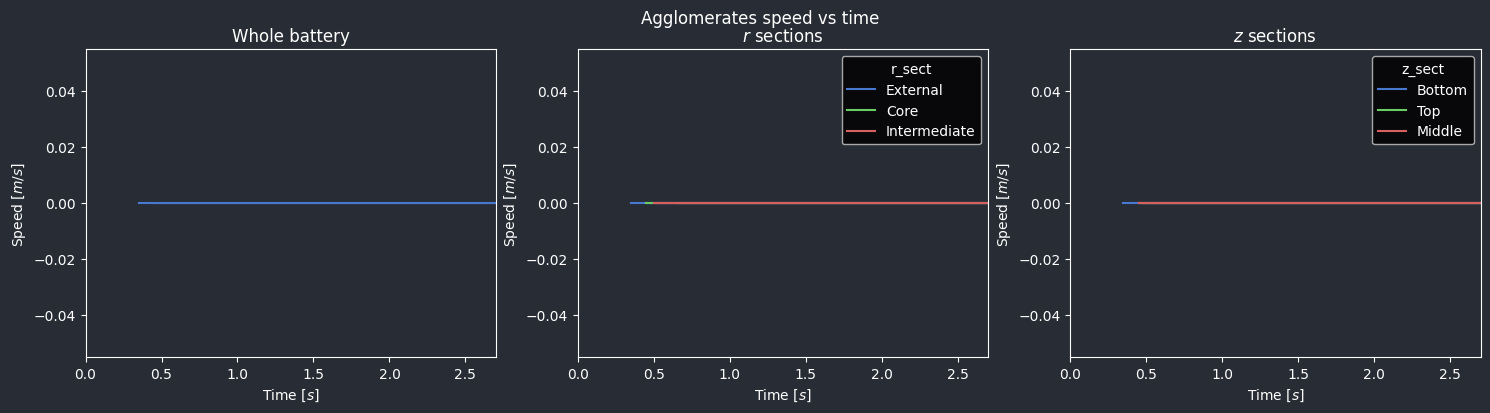

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
# fig.suptitle('Agglomerates speed vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='v')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='v', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='v', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Speed [$m/s$]')

Volume expansion rate of the agglomerates

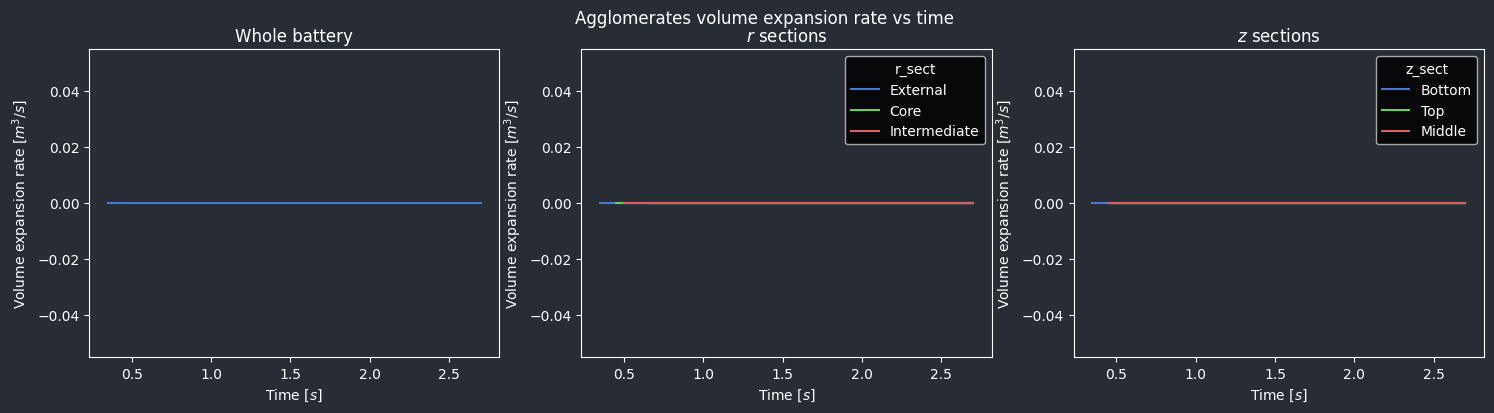

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(18, 4), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

sns.lineplot(ax=axs[0], data=df, x='t', y='dVdt')
axs[0].set_title('Whole battery')

sns.lineplot(ax=axs[1], data=df, x='t', y='dVdt', hue='r_sect')
axs[1].set_title('$r$ sections')
axs[1].legend(loc='lower right')

sns.lineplot(ax=axs[2], data=df, x='t', y='dVdt', hue='z_sect')
axs[2].set_title('$z$ sections')
axs[2].legend(loc='lower right')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    # ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Volume expansion rate [$m^3/s$]')

Region-wise density of agglomerates

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5), facecolor='#282C34')
fig.suptitle('Agglomerates volume expansion rate vs time')

agg_number_r = pd.DataFrame(columns=['Time', 'Number', 'r_sect'])
agg_number_z = pd.DataFrame(columns=['Time', 'Number', 'z_sect'])
r_sect_list = ['Core', 'Intermediate', 'External']
z_sect_list = ['Top', 'Middle', 'Bottom']
for t in time_axis:
    for r, z in zip(r_sect_list, z_sect_list):
        agg_number_r = pd.concat([agg_number_r, pd.DataFrame([[t, 0, r]], columns=['Time', 'Number', 'r_sect'])], ignore_index=True)
        agg_number_z = pd.concat([agg_number_z, pd.DataFrame([[t, 0, z]], columns=['Time', 'Number', 'z_sect'])], ignore_index=True)
for i in range(len(df)):
    agg_number_r.loc[(agg_number_r['Time'] == df['t'][i]) & (agg_number_r['r_sect'] == df['r_sect'][i]), 'Number'] += 1
    agg_number_z.loc[(agg_number_z['Time'] == df['t'][i]) & (agg_number_z['z_sect'] == df['z_sect'][i]), 'Number'] += 1

sns.lineplot(ax=axs[1], data=agg_number_r, x='Time', y='Number', hue='r_sect')
axs[1].set_title('$r$ sections')

sns.lineplot(ax=axs[2], data=agg_number_z, x='Time', y='Number', hue='z_sect')
axs[2].set_title('$z$ sections')

for ax in axs:
    ax.set_facecolor('#282C34')
    ax.set_xlabel('Time [$s$]')
    ax.set_xlim(time_axis[0], time_axis[-1])
    _ = ax.set_ylabel('Agglomerate density [a.u.]')